<a href="https://colab.research.google.com/github/Mahjabeenqamar1/HAM_SPAM/blob/main/Ham__spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/AI_projcet/spam.csv",encoding='latin-1')


In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df["v1"].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [ ]:
df[df['v1']=='spam']['v1'].count()   # binary data


747

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['v2'], df['v1'],test_size=0.3,random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train = vectorizer.fit_transform(X_train_raw)

In [ ]:
X_test = vectorizer.transform(X_test_raw)

In [ ]:
classifier = LogisticRegression()

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predictions = classifier.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
for i, prediction in enumerate(predictions[:5]):
  print('Prediction: %s. Message: %s' % (prediction,list( X_test_raw)[i]))

Prediction: ham. Message: Funny fact Nobody teaches volcanoes 2 erupt, tsunamis 2 arise, hurricanes 2 sway aroundn no 1 teaches hw 2 choose a wife Natural disasters just happens
Prediction: ham. Message: I sent my scores to sophas and i had to do secondary application for a few schools. I think if you are thinking of applying, do a research on cost also. Contact joke ogunrinde, her school is one me the less expensive ones
Prediction: ham. Message: We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
Prediction: ham. Message: Only if you promise your getting out as SOON as you can. And you'll text me in the morning to let me know you made it in ok.
Prediction: spam. Message: Congratulations ur awarded either å£500 of CD gift vouchers & Free entry 2 our å£100 weekly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

[[4 1]
 [2 3]]


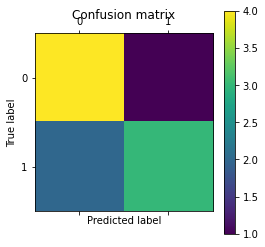

In [ ]:
y_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
 from sklearn.metrics import accuracy_score
 y_pred, y_true = [0, 1, 1, 0], [1, 1, 1, 1]
 print ('Accuracy:', accuracy_score(y_true, y_pred))

Accuracy: 0.5


In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression
#from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AI_projcet/spam.csv',encoding='latin-1')

In [ ]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df['v2'], df['v1'])

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
scores = cross_val_score(classifier, X_train, y_train, cv=5)
print( np.mean(scores), scores)

0.9521413632066011 [0.95574163 0.95215311 0.95095694 0.95095694 0.9508982 ]


In [ ]:
scores = cross_val_score(classifier, X_train, y_train, cv=10)
print( np.mean(scores), scores)

0.9571661331222103 [0.9569378  0.96411483 0.9569378  0.94976077 0.95454545 0.95454545
 0.95215311 0.96411483 0.96411483 0.95443645]


In [ ]:
from sklearn.metrics import make_scorer, precision_score
from sklearn.model_selection import cross_val_score

precision = make_scorer(precision_score,pos_label="ham")
accuracy = cross_val_score(classifier, X_train, y_train, cv=10,scoring=precision)